# Análise das Emendas PIX com Clusters

Este notebook carrega `data/dados_com_clusters.csv` e realiza as etapas descritas na metodologia do projeto:
1. *Exploração inicial*
2. *Modelagem OLS com efeitos fixos de partido*
3. *Modelagem multinível step-up*


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [10]:
df = pd.read_csv('../data/dados_com_clusters.csv').dropna()
df.head()

,municipio,sigla_municipio,prefeito_eleito_2024,sigla_partido_prefeito_eleito,porcentagem_votos_validos_2024,emendas_pix_per_capita_partido_prefeito_eleito,idhm_2010,alfabetizacao_2010,pib_per_capita_2021,densidade_demografica_2010,cluster_0,cluster_1,cluster_2,cluster_3
0,ABADIA DE GOIAS - GO,GO,WANDER SARAIVA,PP,1.000000,18716.018402,0.708,92.19,18491.217064,133.397997,False,False,True,False
1,ABADIA DOS DOURADOS - MG,MG,CIRO,PSD,0.575992,3188.775510,0.689,90.88,28184.630102,7.127400,False,False,True,False
2,ABADIANIA - GO,GO,DR ITAMAR,PP,0.619504,3481.894150,0.689,89.16,25842.850511,16.509351,False,False,True,False
3,ABAETE - MG,MG,IVANIR,MDB,0.491826,1764.057332,0.698,91.28,23869.415656,12.479830,False,False,True,False
4,ABAETETUBA - PA,PA,FRANCINETI CARVALHO,MDB,0.417201,2528.605204,0.628,86.29,12322.938529,98.228786,False,False,True,False


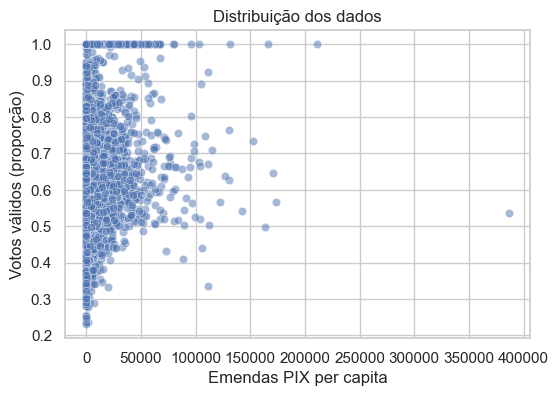

In [11]:
sns.set(style='whitegrid')
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,
                x='emendas_pix_per_capita_partido_prefeito_eleito',
                y='porcentagem_votos_validos_2024',
                alpha=0.5)
plt.xlabel('Emendas PIX per capita')
plt.ylabel('Votos válidos (proporção)')
plt.title('Distribuição dos dados')
plt.show()

In [12]:
formula = 'porcentagem_votos_validos_2024 ~ emendas_pix_per_capita_partido_prefeito_eleito + C(sigla_partido_prefeito_eleito) + cluster_0 + cluster_1 + cluster_2 + cluster_3'
ols_res = smf.ols(formula, data=df).fit(cov_type='HC3')
print(ols_res.summary())

                                  OLS Regression Results                                  
Dep. Variable:     porcentagem_votos_validos_2024   R-squared:                       0.045
Model:                                        OLS   Adj. R-squared:                  0.041
Method:                             Least Squares   F-statistic:                     3663.
Date:                            Sun, 15 Jun 2025   Prob (F-statistic):               0.00
Time:                                    18:42:25   Log-Likelihood:                 2671.2
No. Observations:                            5186   AIC:                            -5288.
Df Residuals:                                5159   BIC:                            -5112.
Df Model:                                      26                                         
Covariance Type:                              HC3                                         
                                                        coef    std err          z      P>

In [13]:
# Modelo nulo
null_md = smf.mixedlm('porcentagem_votos_validos_2024 ~ 1', df, groups=df['sigla_partido_prefeito_eleito']).fit()

# Interceptos aleatórios
ri_md = smf.mixedlm('porcentagem_votos_validos_2024 ~ emendas_pix_per_capita_partido_prefeito_eleito',
                    df, groups=df['sigla_partido_prefeito_eleito']).fit()

# Intercepto e inclinação aleatórios
ris_md = smf.mixedlm('porcentagem_votos_validos_2024 ~ emendas_pix_per_capita_partido_prefeito_eleito',
                     df, groups=df['sigla_partido_prefeito_eleito'],
                     re_formula='~emendas_pix_per_capita_partido_prefeito_eleito').fit()

# Modelo completo com clusters
full_md = smf.mixedlm('porcentagem_votos_validos_2024 ~ emendas_pix_per_capita_partido_prefeito_eleito + cluster_0 + cluster_1 + cluster_2 + cluster_3',
                      df, groups=df['sigla_partido_prefeito_eleito'],
                      re_formula='~emendas_pix_per_capita_partido_prefeito_eleito').fit()

for lbl, m in [('Nulo', null_md), ('RI', ri_md), ('RI+RS', ris_md), ('Completo', full_md)]:
    print('', lbl)
    display(m.summary())

e:\Learning\TCC-MBA\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
e:\Learning\TCC-MBA\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
e:\Learning\TCC-MBA\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\Learning\TCC-MBA\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
e:\Learning\TCC-MBA\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warning

 Nulo


e:\Learning\TCC-MBA\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\Learning\TCC-MBA\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
e:\Learning\TCC-MBA\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 77.023512
  warnings.warn(msg, ConvergenceWarning)
e:\Learning\TCC-MBA\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
e:\Learning\TCC-MBA\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
============================================================================
Model:            MixedLM Dependent Variable: porcentagem_votos_validos_2024
No. Observations: 5186    Method:             REML                          
No. Groups:       23      Scale:              0.0218                        
Min. group size:  2       Log-Likelihood:     2552.9590                     
Max. group size:  834     Converged:          Yes                           
Mean group size:  225.5                                                     
--------------------------------------------------------------------------------
                  Coef.     Std.Err.        z        P>|z|     [0.025     0.975]
--------------------------------------------------------------------------------
Intercept         0.612        0.004     152.211     0.000      0.605      0.620
Group Var         0.000        0.001                                            
============================================================================

"""

 RI


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Mixed Linear Model Regression Results
=========================================================================================
Model:                 MixedLM     Dependent Variable:     porcentagem_votos_validos_2024
No. Observations:      5186        Method:                 REML                          
No. Groups:            23          Scale:                  0.0211                        
Min. group size:       2           Log-Likelihood:         2617.0696                     
Max. group size:       834         Converged:              Yes                           
Mean group size:       225.5                                                             
-----------------------------------------------------------------------------------------
                                               Coef. Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                      0.602    0.004 145.568 0.000  0.594  0.610
emendas_pix_per_capita_partido_prefeito_eleito 0.000    0.000  12.671 0.000  0.000  0.000
Group Var                                      0.000    0.001                            
=========================================================================================

"""

 RI+RS


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Mixed Linear Model Regression Results
====================================================================================================
Model:                    MixedLM         Dependent Variable:         porcentagem_votos_validos_2024
No. Observations:         5186            Method:                     REML                          
No. Groups:               23              Scale:                      0.0209                        
Min. group size:          2               Log-Likelihood:             2453.9766                     
Max. group size:          834             Converged:                  Yes                           
Mean group size:          225.5                                                                     
----------------------------------------------------------------------------------------------------
                                                           Coef. Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------------
Intercept                                                  0.600    0.010 57.712 0.000  0.580  0.621
emendas_pix_per_capita_partido_prefeito_eleito             0.000    0.009  0.000 1.000 -0.017  0.017
Group Var                                                  0.002                                    
Group x emendas_pix_per_capita_partido_prefeito_eleito Cov 0.000                                    
emendas_pix_per_capita_partido_prefeito_eleito Var         0.001                                    
====================================================================================================

"""

 Completo


e:\Learning\TCC-MBA\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Mixed Linear Model Regression Results
====================================================================================================
Model:                    MixedLM         Dependent Variable:         porcentagem_votos_validos_2024
No. Observations:         5186            Method:                     REML                          
No. Groups:               23              Scale:                      0.0208                        
Min. group size:          2               Log-Likelihood:             2468.6105                     
Max. group size:          834             Converged:                  No                            
Mean group size:          225.5                                                                     
----------------------------------------------------------------------------------------------------
                                                           Coef.  Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------------
Intercept                                                   1.816                                   
cluster_0[T.True]                                          -1.207                                   
cluster_1[T.True]                                          -1.208                                   
cluster_2[T.True]                                          -1.224                                   
cluster_3[T.True]                                          -1.175                                   
emendas_pix_per_capita_partido_prefeito_eleito              0.000    0.009 0.000 1.000 -0.017  0.017
Group Var                                                   0.002                                   
Group x emendas_pix_per_capita_partido_prefeito_eleito Cov  0.000                                   
emendas_pix_per_capita_partido_prefeito_eleito Var          0.001                                   
====================================================================================================

"""